In [1]:
import os
os.getcwd()

'C:\\Users\\LENOVO'

In [2]:
os.chdir('C:\\Users\\LENOVO\\Desktop\\Documents\\AML\\Project')

In [3]:
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\Documents\\AML\\Project'

In [4]:
import pandas as pd
churn_df = pd.read_csv('telecom_churn.csv')

In [5]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [6]:
columns= churn_df.columns
selected_columns=columns[1:-1]
selected_columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')

In [7]:
clustered_data= churn_df.loc[:,selected_columns]

In [8]:
from sklearn.preprocessing import OneHotEncoder
y = pd.get_dummies(churn_df['International plan'], prefix='International plan')
z = pd.get_dummies(churn_df['Voice mail plan'], prefix='Voice mail plan')
churn_df_transformed = pd.concat([churn_df,y,z],axis=1)
churn_df_transformed.drop(['International plan','Voice mail plan','State'],axis=1, inplace=True)
churn_df_transformed

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,False,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,False,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,False,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,False,0,1,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,False,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,12.56,9.9,6,2.67,2,False,1,0,0,1
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,8.61,9.6,4,2.59,3,False,1,0,1,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,8.64,14.1,6,3.81,2,False,1,0,1,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,6.26,5.0,10,1.35,2,False,0,1,1,0


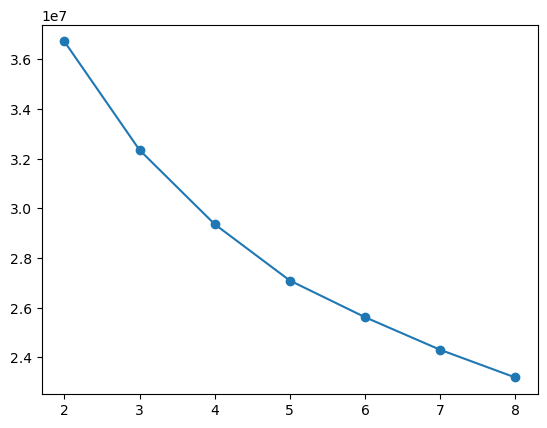

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clusters_range=[2,3,4,5,6,7,8]
inertias=[]

for c in clusters_range:
    kmeans= KMeans(init= 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(churn_df_transformed)
    inertias.append(kmeans.inertia_)
  
plt.figure()
plt.plot(clusters_range,inertias, marker='o')
plt.show()

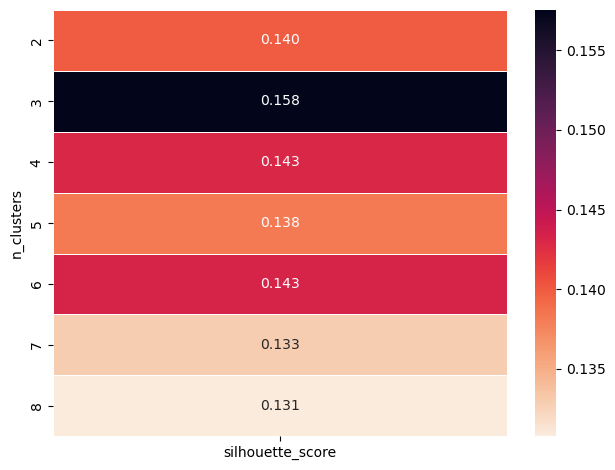

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range=[2,3,4,5,6,7,8]
results=[]

for c in clusters_range:
    clusterer= KMeans(init= 'k-means++', n_clusters=c, n_init=100, random_state=0)
    cluster_labels = clusterer.fit_predict(churn_df_transformed)
    silhouette_avg = silhouette_score(churn_df_transformed, cluster_labels)
    results.append([c,silhouette_avg])

result= pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
pivot_km= pd.pivot_table(result, index="n_clusters", values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap= sns.cm.rocket_r)
plt.tight_layout()

In [11]:
kmeans_sel = KMeans(init= 'k-means++', n_clusters=3, n_init=100, random_state=0).fit(churn_df_transformed)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = clustered_data.assign(cluster=labels)

<AxesSubplot:xlabel='Total day minutes', ylabel='Total eve minutes'>

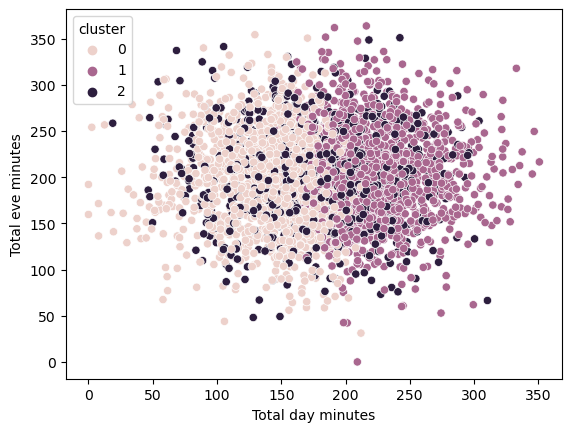

In [12]:
import seaborn as sns
sns.scatterplot(data=clustered_data, x="Total day minutes", y="Total eve minutes", hue="cluster")

<AxesSubplot:xlabel='Total day minutes', ylabel='Total day charge'>

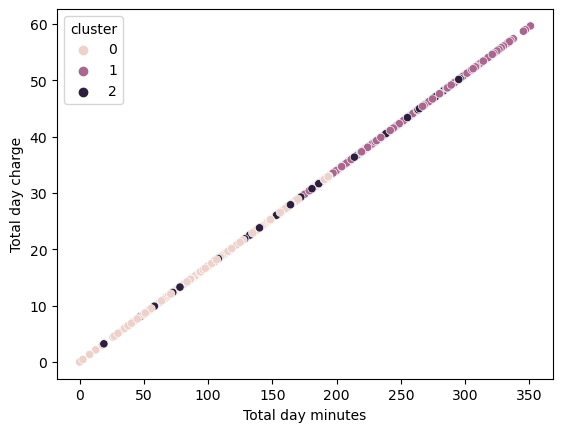

In [13]:
sns.scatterplot(data=clustered_data, x="Total day minutes", y="Total day charge", hue="cluster")

<AxesSubplot:xlabel='Total day minutes', ylabel='Total night minutes'>

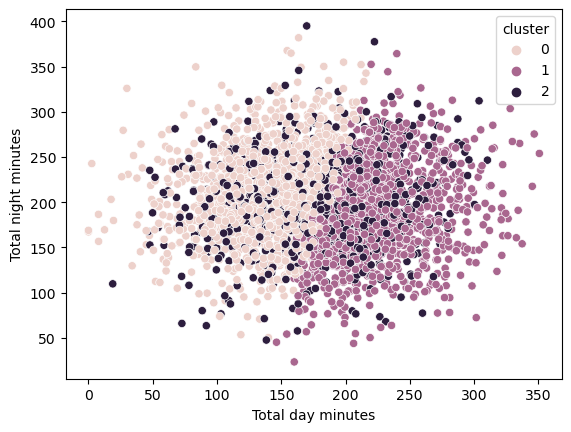

In [14]:
sns.scatterplot(data=clustered_data, x="Total day minutes", y="Total night minutes", hue="cluster")

In [15]:
grouped_km=clustered_data.groupby(["cluster"]).mean().round(1)
grouped_km

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
cluster,,,,,,,,,,,,,,,,
0,100.2,412.8,7.7,139.9,100.7,23.8,196.6,100.3,16.7,211.4,99.8,9.5,10.3,4.5,2.8,1.5
1,102.7,413.9,8.5,225.5,100.3,38.3,205.6,100.3,17.5,189.7,100.2,8.5,10.2,4.5,2.8,1.5
2,100.0,510.0,8.1,177.0,100.1,30.1,201.2,99.5,17.1,200.4,100.4,9.0,10.1,4.4,2.7,1.6


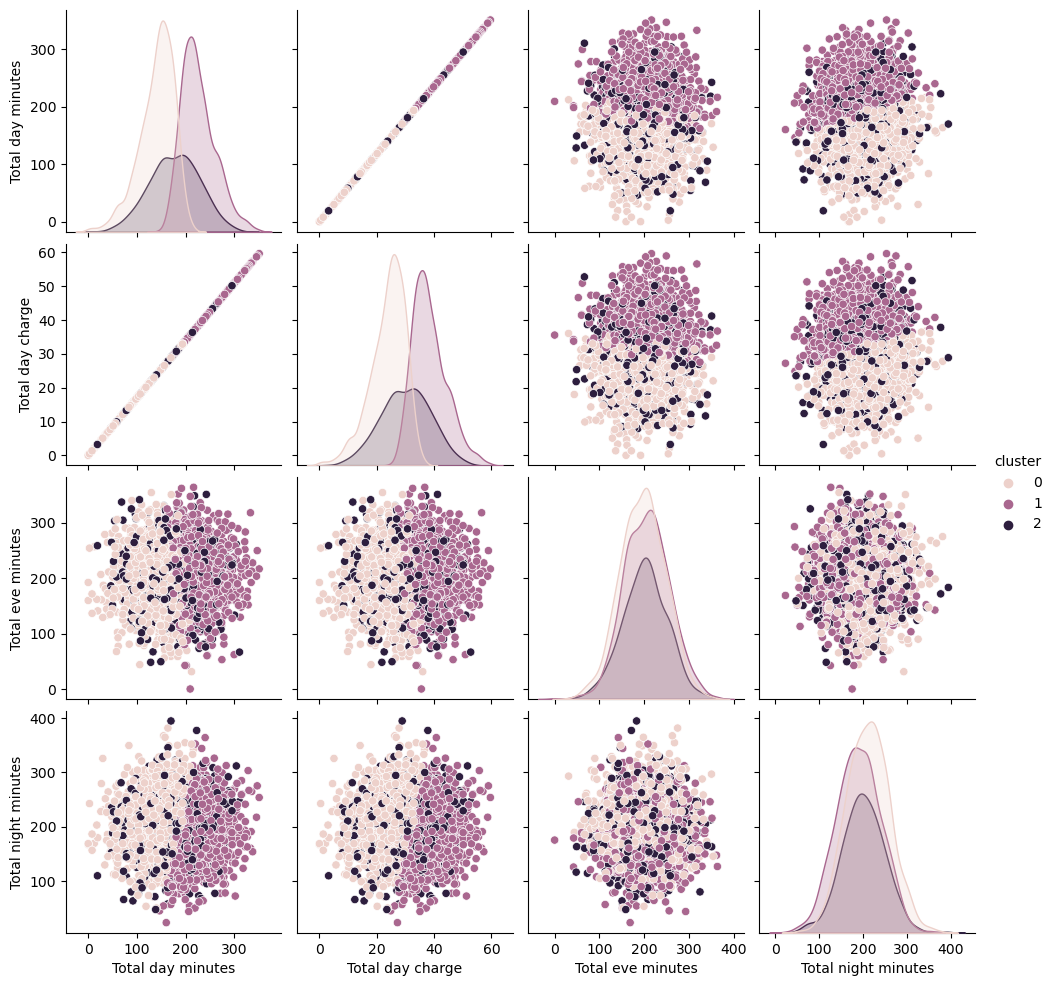

In [16]:
df=clustered_data[["Total day minutes","Total day charge","Total eve minutes","Total night minutes","cluster"]]
sns.pairplot(df, hue="cluster")

In [17]:
churn_df_transformed.loc[churn_df_transformed['Churn'] == True, 'Churn_num'] = 1
churn_df_transformed.loc[churn_df_transformed['Churn'] == False, 'Churn_num'] = 0
print(churn_df_transformed)

      Account length  Area code  Number vmail messages  Total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
3328             192        415                     36              156.2   
3329              68        415                      0              231.1   
3330              28        510                      0              180.8   
3331             184        510                      0              213.8   
3332              74        415                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls

In [18]:
churn_df_transformed=churn_df_transformed.drop(["Churn"], axis=1)
print(churn_df_transformed)

      Account length  Area code  Number vmail messages  Total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
3328             192        415                     36              156.2   
3329              68        415                      0              231.1   
3330              28        510                      0              180.8   
3331             184        510                      0              213.8   
3332              74        415                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls

In [19]:
from sklearn.preprocessing import StandardScaler
print(churn_df_transformed)
scaler= StandardScaler()
churn_df_transformed_std=scaler.fit_transform(churn_df_transformed)
print(churn_df_transformed_std)

      Account length  Area code  Number vmail messages  Total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
3328             192        415                     36              156.2   
3329              68        415                      0              231.1   
3330              28        510                      0              180.8   
3331             184        510                      0              213.8   
3332              74        415                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls

In [20]:
#Build a logistic Regression model and apply regularization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(churn_df_transformed, test_size=0.2, random_state=25)

y_train = training_data['Churn_num']
X_train = training_data.drop('Churn_num', axis=1)

y_test = testing_data['Churn_num']
X_test = testing_data.drop('Churn_num', axis=1)

# Standardize the train and test sample
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
lr_model.fit(X_train_std, y_train)

y_pred_proba1 = lr_model.predict_proba(X_test)[::,1]
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
print("AUC for basic model: ",auc1)

gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_train_std, y_train)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_train_std, y_train)

y_pred_proba2 = model.predict_proba(X_test)[::,1]
#calculate AUC of model
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)

#print AUC score
print("AUC for model after applying L1: ",auc2)


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


AUC for basic model:  0.5
AUC for model after applying L1:  0.5008741258741258


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [22]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel

sel_ = SelectFromModel(LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear'))
sel_.fit(X_train_std, y_train)
selected_feat = X_train.columns[(sel_.get_support())]
print(selected_feat)

Index(['Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'International plan_No',
       'International plan_Yes', 'Voice mail plan_No', 'Voice mail plan_Yes'],
      dtype='object')


In [23]:
coef= model.coef_[0]
coef

array([ 0.        ,  0.        ,  0.        ,  0.11883618,  0.05813946,
        0.49559493,  0.17274249,  0.        ,  0.11713718,  0.02732119,
        0.00265471,  0.10131391,  0.        , -0.16387703,  0.22163932,
        0.57473771, -0.17832146,  0.3688689 ,  0.10194363, -0.2383479 ])

In [24]:
imp_features = pd.Series(X_train.columns)[list(coef!=0)]
imp_features

3          Total day minutes
4            Total day calls
5           Total day charge
6          Total eve minutes
8           Total eve charge
9        Total night minutes
10         Total night calls
11        Total night charge
13          Total intl calls
14         Total intl charge
15    Customer service calls
16     International plan_No
17    International plan_Yes
18        Voice mail plan_No
19       Voice mail plan_Yes
dtype: object

In [25]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
churn_df_transformed_std=scaler.fit_transform(churn_df_transformed)
print(churn_df_transformed_std)

[[ 0.67648946 -0.52360328  1.23488274 ... -1.6170861   1.6170861
  -0.41167182]
 [ 0.14906505 -0.52360328  1.30794844 ... -1.6170861   1.6170861
  -0.41167182]
 [ 0.9025285  -0.52360328 -0.59175986 ...  0.61839626 -0.61839626
  -0.41167182]
 ...
 [-1.83505538  1.71881732 -0.59175986 ...  0.61839626 -0.61839626
  -0.41167182]
 [ 2.08295458  1.71881732 -0.59175986 ...  0.61839626 -0.61839626
  -0.41167182]
 [-0.67974475 -0.52360328  1.23488274 ... -1.6170861   1.6170861
  -0.41167182]]


In [34]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(churn_df_transformed_std)

PCA()

In [35]:
pca.explained_variance_ratio_

array([1.41056596e-01, 1.10423525e-01, 9.81082254e-02, 9.61015016e-02,
       9.30685188e-02, 8.81662510e-02, 5.47511573e-02, 5.06021141e-02,
       4.82961374e-02, 4.74196984e-02, 4.64335531e-02, 4.61394051e-02,
       4.54153943e-02, 3.13011152e-02, 2.71641294e-03, 3.44485303e-07,
       3.72861440e-08, 1.06245398e-08, 2.27264117e-09, 5.14087087e-34,
       2.44641199e-34])

Text(0, 0.5, 'Cumulative Explained Variance')

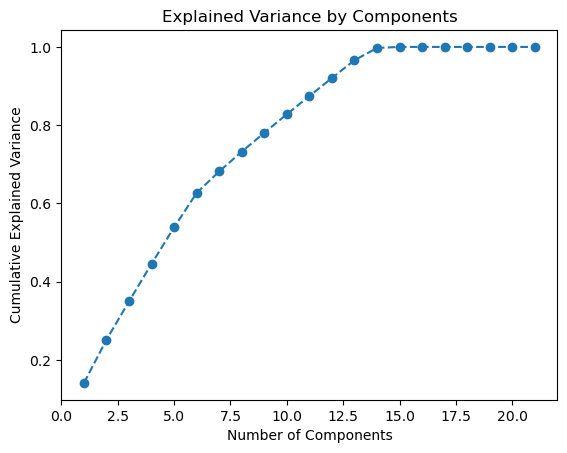

In [36]:
plt.plot(range(1,22),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [38]:
pca1=PCA(n_components = 15)
pca1.fit(churn_df_transformed_std)

PCA(n_components=15)

In [40]:
scores_pca=pca1.transform(churn_df_transformed_std)

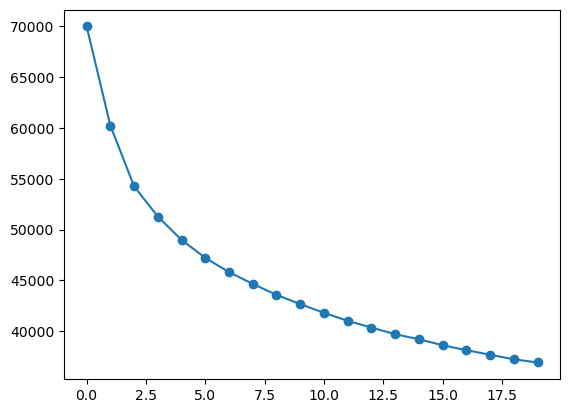

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
clusters_range=[2,3,4,5,6,7,8]
inertias=[]

for c in range(1,21):
    kmeans= KMeans(init= 'k-means++', n_clusters=c, n_init=100, random_state=0).fit(scores_pca)
    inertias.append(kmeans.inertia_)
  
plt.figure()
plt.plot(inertias, marker='o')
plt.show()

In [44]:
kmeans_pca = KMeans(init= 'k-means++', n_clusters=2, n_init=100, random_state=0).fit(scores_pca)

In [51]:
import pandas as pd
churn_df_pca_kmeans= pd.concat([churn_df_transformed.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
churn_df_pca_kmeans.columns.values[-15:]=['Component1','Component2','Component3','Component4','Component5','Component6','Component7','Component8','Component9','Component10','Component11','Component12','Component13','Component14','Component15']
churn_df_pca_kmeans['K-means cluster using PCA']= kmeans_pca.labels_
print(churn_df_pca_kmeans)

      Account length  Area code  Number vmail messages  Total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
3328             192        415                     36              156.2   
3329              68        415                      0              231.1   
3330              28        510                      0              180.8   
3331             184        510                      0              213.8   
3332              74        415                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Component1', ylabel='Component2'>

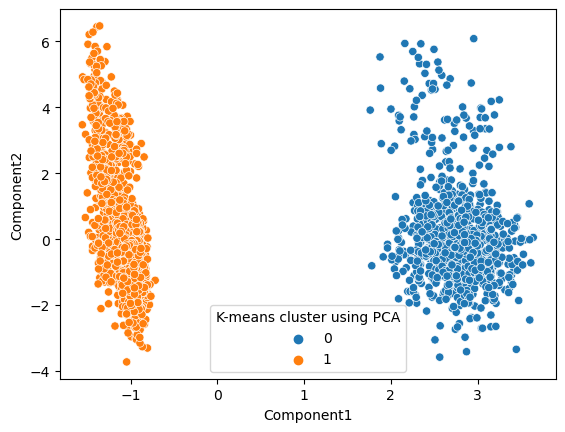

In [52]:
x_axis=churn_df_pca_kmeans['Component1']
y_axis=churn_df_pca_kmeans['Component2']
sns.scatterplot(x_axis,y_axis, hue=churn_df_pca_kmeans["K-means cluster using PCA"])